<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Sefatullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SHAPE = (224, 224,3)

train_path = '/content/drive/MyDrive/Final year project/Mobilenetv2/Train'
test_path = '/content/drive/MyDrive/Final year project/Mobilenetv2/Test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #zoom_range = 0.2,
                                   rotation_range=10,
                                   #brightness_range=[0.5, 1.5],
                                   vertical_flip=False,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1017 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle =False)

Found 290 images belonging to 4 classes.


In [ ]:

dense = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False) #MobileNetV2 model algorithom download

for layer in dense.layers:
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(4, activation='softmax')(x) #customize the model with our dataset
model = Model(inputs=dense.input, outputs=prediction)

model.compile( #compiling our customize model
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

In [ ]:
h=model.fit(
  training_set,
  validation_data=test_set,
  batch_size=32, #data train korbe 8 ta kore ekbare
  epochs=20, #hole data ke total 20 bar train korano hoi
  
)

Epoch 1/20
32/32 [==============================] - 54s 2s/step - loss: 4.2542 - accuracy: 0.6834 - val_loss: 1.6740 - val_accuracy: 0.8310
Epoch 2/20
32/32 [==============================] - 50s 2s/step - loss: 1.0231 - accuracy: 0.9036 - val_loss: 1.1397 - val_accuracy: 0.8448
Epoch 3/20
32/32 [==============================] - 49s 2s/step - loss: 0.5481 - accuracy: 0.9302 - val_loss: 1.2104 - val_accuracy: 0.8828
Epoch 4/20
32/32 [==============================] - 49s 2s/step - loss: 0.3281 - accuracy: 0.9577 - val_loss: 0.7915 - val_accuracy: 0.9069
Epoch 5/20
32/32 [==============================] - 49s 2s/step - loss: 0.2741 - accuracy: 0.9666 - val_loss: 1.0082 - val_accuracy: 0.8931
Epoch 6/20
32/32 [==============================] - 49s 2s/step - loss: 0.2565 - accuracy: 0.9725 - val_loss: 1.0013 - val_accuracy: 0.8931
Epoch 7/20
32/32 [==============================] - 49s 2s/step - loss: 0.1774 - accuracy: 0.9725 - val_loss: 1.0472 - val_accuracy: 0.8690
Epoch 8/20
32/32 [==

In [ ]:
loss,test_accuracy =model.evaluate(test_set)
print('Accuracy on test:',test_accuracy)

10/10 [==============================] - 5s 513ms/step - loss: 1.7359 - accuracy: 0.9172
Accuracy on test: 0.9172413945198059


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# T0 print the Classification Report
y_pred =model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       1.00      0.70      0.82        77
           2       0.77      1.00      0.87        79
           3       1.00      1.00      1.00        62

    accuracy                           0.92       290
   macro avg       0.94      0.92      0.92       290
weighted avg       0.94      0.92      0.92       290



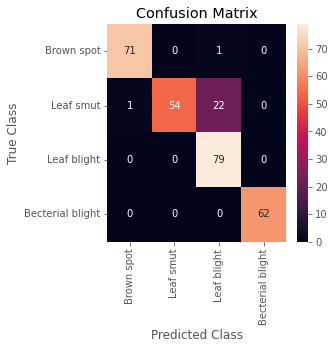

In [ ]:
# To print the Confusion Matrix
cf_matrix = confusion_matrix(test_set.classes,y_pred)
Labels = ['Brown spot','Leaf smut','Leaf blight','Becterial blight']
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

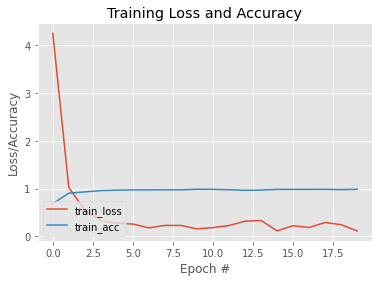

In [ ]:
# plot the training loss and accuracy
N = epochs=20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# মডেলের সাইজ কিলোবাইটে
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpv5i54juy/assets


Float model size = 9631KBs.


In [ ]:
f = open('paddy_mobile2.tflite', "wb")
f.write(tflite_float_model)
f.close()

# ডাউনলোড করি mnist.tflite হিসেবে
from google.colab import files
files.download('paddy_mobile2.tflite')

print('`paddy_mobile2.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`paddy_mobile2.tflite` has been downloaded
